In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import seaborn as sns

In [10]:
file_path = "./Data/weather.csv"
df = pd.read_csv(file_path)
df

,st,year,month,rain,press,RH,temp,wind
0,4617,2012,1,2.009362,1012.006040,87.932273,28.134635,22.586657
1,4617,2012,2,0.427580,1012.468929,88.495974,30.140768,23.688523
2,4617,2012,3,0.711929,1012.038308,85.620107,31.494352,25.537537
3,4617,2012,4,3.033757,1010.481737,90.078361,32.573924,26.283908
4,4617,2012,5,7.905029,1007.035107,92.220625,32.332810,26.928105
...,...,...,...,...,...,...,...,...
45719,3415,2023,6,10.841471,1007.360788,93.550307,33.879724,24.958045
45720,3415,2023,7,14.569798,1007.929544,93.638653,33.495979,24.744300
45721,3415,2023,8,10.424915,1009.604023,94.018811,33.075928,24.663779
45722,3415,2023,9,14.894755,1010.396213,95.638171,32.028740,24.390650


In [11]:
print(df.shape)
df.describe

(45724, 8)


<bound method NDFrame.describe of          st  year  month       rain        press         RH       temp  \
0      4617  2012      1   2.009362  1012.006040  87.932273  28.134635   
1      4617  2012      2   0.427580  1012.468929  88.495974  30.140768   
2      4617  2012      3   0.711929  1012.038308  85.620107  31.494352   
3      4617  2012      4   3.033757  1010.481737  90.078361  32.573924   
4      4617  2012      5   7.905029  1007.035107  92.220625  32.332810   
...     ...   ...    ...        ...          ...        ...        ...   
45719  3415  2023      6  10.841471  1007.360788  93.550307  33.879724   
45720  3415  2023      7  14.569798  1007.929544  93.638653  33.495979   
45721  3415  2023      8  10.424915  1009.604023  94.018811  33.075928   
45722  3415  2023      9  14.894755  1010.396213  95.638171  32.028740   
45723  3415  2023     10   5.691344  1013.097928  93.201711  32.815577   

            wind  
0      22.586657  
1      23.688523  
2      25.537537  
3

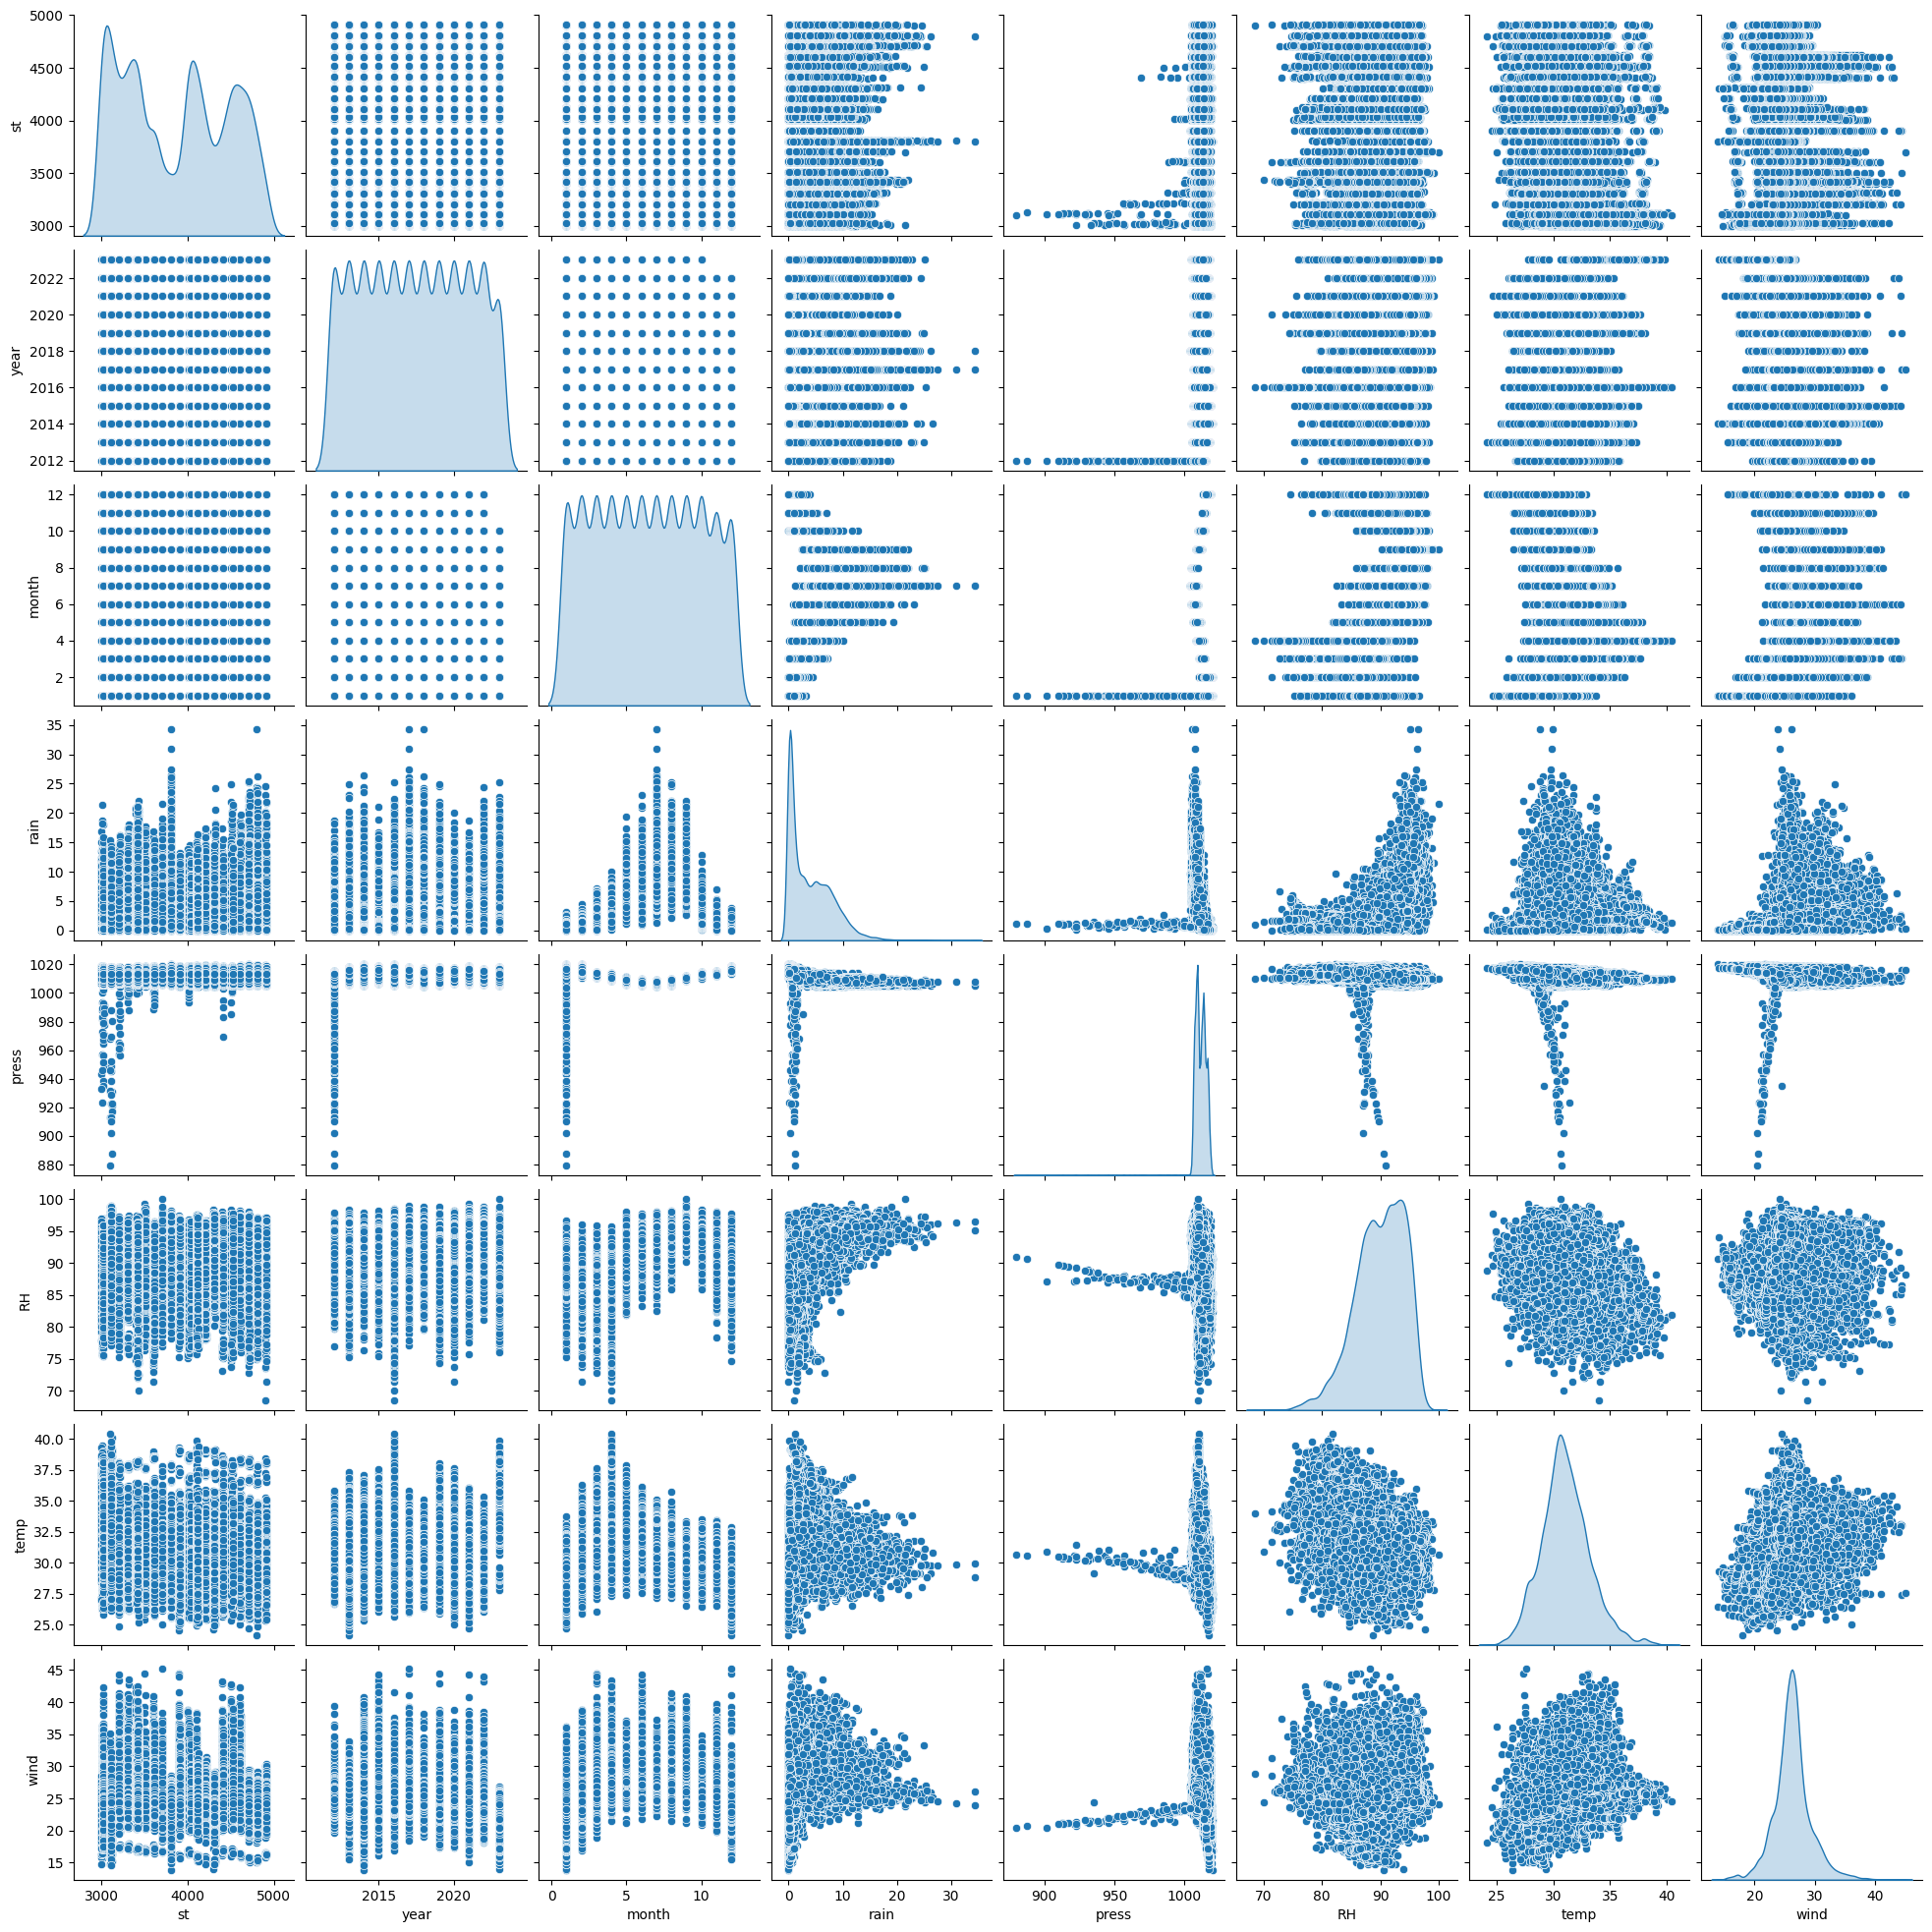

In [12]:
sns.pairplot(df, diag_kind='kde') # hist, kde

In [13]:
df.corr()

,st,year,month,rain,press,RH,temp,wind
st,1.000000e+00,2.009508e-13,-8.146496e-16,0.042490,0.017309,0.055281,-0.225747,0.030224
year,2.009508e-13,1.000000e+00,-3.360497e-02,0.062374,0.057615,0.041598,0.081584,-0.169434
month,-8.146496e-16,-3.360497e-02,1.000000e+00,0.202936,-0.041890,0.492406,-0.227465,0.074091
rain,4.249031e-02,6.237385e-02,2.029357e-01,1.000000,-0.600335,0.672486,0.136399,0.305258
press,1.730885e-02,5.761499e-02,-4.189036e-02,-0.600335,1.000000,-0.382809,-0.370215,-0.342746
RH,5.528112e-02,4.159839e-02,4.924057e-01,0.672486,-0.382809,1.000000,-0.156533,0.150475
temp,-2.257469e-01,8.158367e-02,-2.274648e-01,0.136399,-0.370215,-0.156533,1.000000,0.285349
wind,3.022371e-02,-1.694336e-01,7.409066e-02,0.305258,-0.342746,0.150475,0.285349,1.000000


Text(158.22222222222223, 0.5, 'Y-axis Label')

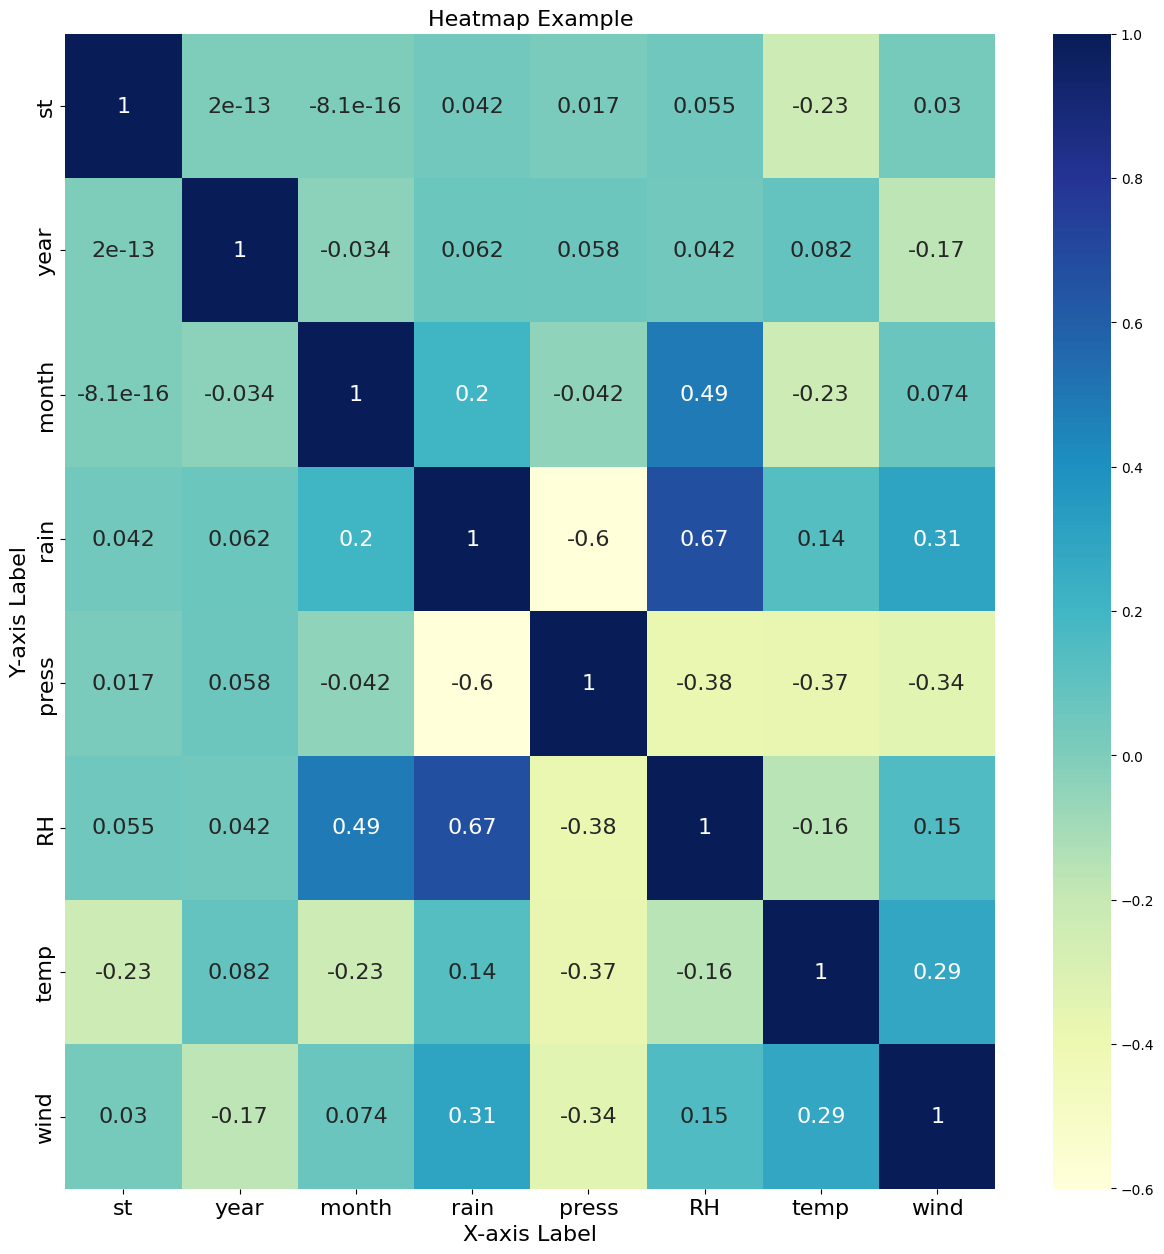

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
hmap = sns.heatmap(df.corr(),annot=True,cmap="YlGnBu", annot_kws={'fontsize':16})
hmap.set_xticklabels(hmap.get_xticklabels(), fontsize=16)
hmap.set_yticklabels(hmap.get_yticklabels(), fontsize=16)
plt.title('Heatmap Example', fontsize=16)
plt.xlabel('X-axis Label', fontsize=16)
plt.ylabel('Y-axis Label', fontsize=16)

In [15]:
df1 = df.query("st==3001")
df1 = df1.drop(columns=['st','press'])
df1.reset_index(drop=True, inplace=True)
df1.set_index(['year', 'month'], inplace=True)
print(df1.head())

                rain         RH       temp       wind
year month                                           
2012 1      0.002512  88.574489  31.534055  20.739619
     2      0.001458  86.343700  33.233622  22.158840
     3      0.429631  87.470451  34.721606  23.639131
     4      3.761624  87.565635  35.789551  25.098930
     5      3.859319  91.610006  35.448514  25.434578


## groupby คือการจัดกลุ่ม

In [16]:
df2 = df.groupby(['st','year']).mean()
df2_drop = df2.drop(columns=['month'])
print(df2_drop.head())

               rain        press         RH       temp       wind
st   year                                                        
3001 2012  3.537760  1010.566834  91.192878  33.534432  23.709663
     2013  2.953060  1011.406580  89.033245  33.060806  22.963483
     2014  2.891560  1011.993461  89.355793  33.716882  22.760756
     2015  3.718678  1012.404685  88.204336  34.126996  22.867849
     2016  3.383527  1011.786722  89.189703  33.563818  23.402232


In [17]:
df3 = df.query("st==3003").drop(columns=['st'])
df4=df3.groupby(['year']).mean()
df4_drop = df4.drop(columns=['month'])
print(df4_drop.head(15))

          rain        press         RH       temp       wind
year                                                        
2012  3.660328  1003.774637  91.098995  32.602979  24.323288
2013  3.554717  1011.343179  90.226466  32.418821  24.110507
2014  3.126364  1011.923648  90.766630  32.736990  25.062794
2015  3.578517  1012.431722  90.265572  33.171715  25.550255
2016  4.234380  1011.828641  89.160829  32.957752  24.437802
2017  4.435014  1011.939053  91.110454  32.082539  23.906894
2018  2.886928  1011.855284  90.842717  32.304486  24.173082
2019  3.226120  1011.898163  88.429015  33.167537  24.834126
2020  3.541759  1011.698863  89.522273  32.703273  24.323734
2021  3.671138  1011.759234  90.913630  32.196174  23.717988
2022  5.223674  1011.421427  91.968416  31.720432  23.640050
2023  4.126808  1011.042952  88.640084  33.724909  23.555505


In [18]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data_std = pd.DataFrame()
data_std[df2_drop.columns] = pd.DataFrame(std_scaler.fit_transform(df2_drop))

print(data_std.info())
print(data_std.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rain    3864 non-null   float64
 1   press   3864 non-null   float64
 2   RH      3864 non-null   float64
 3   temp    3864 non-null   float64
 4   wind    3864 non-null   float64
dtypes: float64(5)
memory usage: 151.1 KB
None
       rain     press        RH      temp      wind
0 -0.587226 -0.861274  0.962645  1.947859 -1.268257
1 -1.280074 -0.023930 -0.644910  1.570038 -1.641342
2 -1.352950  0.561273 -0.404816  2.093403 -1.742704
3 -0.372844  0.971320 -1.261920  2.420560 -1.689159
4 -0.769986  0.355125 -0.528448  1.971301 -1.421971


In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [23]:
X = df4_drop[['rain','press','RH','wind']]
print(X.head(5))
y = df4_drop.pop('temp')
print(y.head())

          rain        press         RH       wind
year                                             
2012  3.660328  1003.774637  91.098995  24.323288
2013  3.554717  1011.343179  90.226466  24.110507
2014  3.126364  1011.923648  90.766630  25.062794
2015  3.578517  1012.431722  90.265572  25.550255
2016  4.234380  1011.828641  89.160829  24.437802
year
2012    32.602979
2013    32.418821
2014    32.736990
2015    33.171715
2016    32.957752
Name: temp, dtype: float64


In [28]:
model = LinearRegression()
model.fit(X,y)
print(X,y)

          rain        press         RH       wind
year                                             
2012  3.660328  1003.774637  91.098995  24.323288
2013  3.554717  1011.343179  90.226466  24.110507
2014  3.126364  1011.923648  90.766630  25.062794
2015  3.578517  1012.431722  90.265572  25.550255
2016  4.234380  1011.828641  89.160829  24.437802
2017  4.435014  1011.939053  91.110454  23.906894
2018  2.886928  1011.855284  90.842717  24.173082
2019  3.226120  1011.898163  88.429015  24.834126
2020  3.541759  1011.698863  89.522273  24.323734
2021  3.671138  1011.759234  90.913630  23.717988
2022  5.223674  1011.421427  91.968416  23.640050
2023  4.126808  1011.042952  88.640084  23.555505 year
2012    32.602979
2013    32.418821
2014    32.736990
2015    33.171715
2016    32.957752
2017    32.082539
2018    32.304486
2019    33.167537
2020    32.703273
2021    32.196174
2022    31.720432
2023    33.724909
Name: temp, dtype: float64


In [34]:
model.coef_,model.intercept_
model.score(X,y)
print(y)
y_predict = model.predict(X)
print('='*40)
print('year\ty_true\t\ty_predict')
print('='*40)
for i, y_true in enumerate(y):
    print(f'{i+2012}\t{y_true:.4f}\t\t{y_predict[i]:.4f}')

year
2012    32.602979
2013    32.418821
2014    32.736990
2015    33.171715
2016    32.957752
2017    32.082539
2018    32.304486
2019    33.167537
2020    32.703273
2021    32.196174
2022    31.720432
2023    33.724909
Name: temp, dtype: float64
year	y_true		y_predict
2012	32.6030		32.6190
2013	32.4188		32.5852
2014	32.7370		32.5408
2015	33.1717		32.8793
2016	32.9578		33.1405
2017	32.0825		32.1704
2018	32.3045		32.2760
2019	33.1675		33.5003
2020	32.7033		32.9257
2021	32.1962		32.1767
2022	31.7204		31.7979
2023	33.7249		33.1757
